In [32]:
### Basic Imports
import pandas as pd
import numpy as np

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 


### Importing the relevant ML libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# , plot_tree
from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,f1_score,precision_score,classification_report,confusion_matrix,auc

from sklearn.svm import SVC   
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error




### Some cosmetics add-ons
plt.style.use('fivethirtyeight')
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

In [21]:
# getting the dataframe
df_2014 = pd.read_csv('annual_data/nba_season_2014_data.csv')
df_2014.head()

,SEASON_ID_x,TEAM_ID_x,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP_x,WL_x,MIN_x,PTS_x,...,OFFRATE_y,DEFRATE_y,ELO_y,DIS_PTS_y,DIS_AST_y,DIS_OREB_y,DIS_DREB_y,DIS_OFFRATE_y,DIS_DEFRATE_y,DIS_ELO_y
0,22014,1610612747,LAL,Los Angeles Lakers,21400003,2014-10-28,LAL vs. HOU,0,240,90,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22014,1610612740,NOP,New Orleans Pelicans,21400001,2014-10-28,NOP vs. ORL,1,240,101,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22014,1610612742,DAL,Dallas Mavericks,21400002,2014-10-28,DAL @ SAS,0,239,100,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22014,1610612749,MIL,Milwaukee Bucks,21400004,2014-10-29,MIL @ CHA,0,264,106,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22014,1610612744,GSW,Golden State Warriors,21400014,2014-10-29,GSW @ SAC,1,239,95,...,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# extracting out the feature list for comparison
features_list = features_list = ['DIS_ELO_x', 'HOME_COURT_x', 'DIS_OFFRATE_x', 'DIS_DEFRATE_x', 'DIS_PTS_x', 'DIS_AST_x', 'DIS_OREB_x', 'DIS_DREB_x']
target = 'WL_x'

In [23]:
def eda_plots(df,features_list,plot_title,fig_size):

    df[features_list].hist(bins=40,edgecolor='b',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid= False,figsize =fig_size,color='red')

    plt.tight_layout(rect=(0,0,1.2,1.2))

    plt.suptitle(plot_title,x=0.65,y=1.25,fontsize=14)

    plt.show()

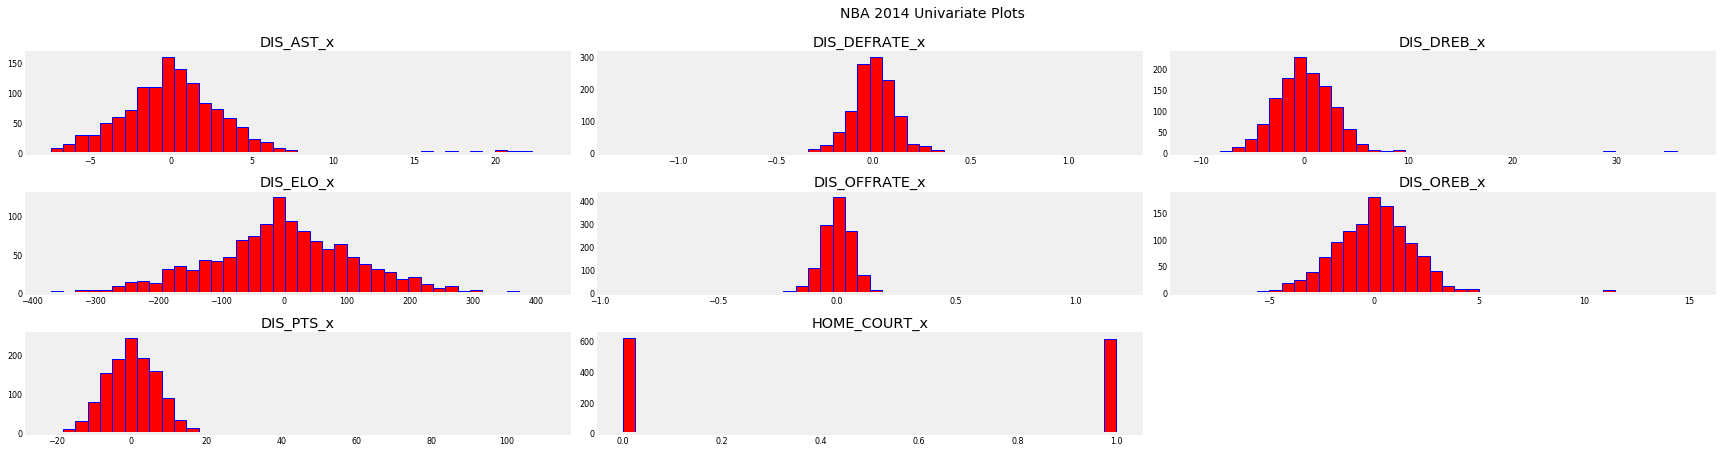

In [24]:
# features distribution
eda_plots(df_2014, features_list,"NBA 2014 Univariate Plots", (20,5))

In [25]:
# separating out the features from our dataset
feature_dataset = df_2014[features_list]

feature_dataset.head()
# target variable is WL
y= df_2014[target]

# split the dataset into test and split

X_train, X_test, y_train, y_test = train_test_split(feature_dataset, y, test_size=0.3, random_state=99) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape # we use .shape to check that the dfs have the correct shapes.


((861, 8), (369, 8), (861,), (369,))

In [27]:
# modelling time 
models_dict = {
    'LogisticRegression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Decision Trees':DecisionTreeClassifier(),
    'SVM': SVC(),
    "RandomForest": RandomForestClassifier(n_estimators = 100)
}

performance_data = {
    'accuracy':[],
    'precision':[],
    'recall':[],
    'f1':[]
}

In [28]:
for model_name in models_dict:
    m = models_dict[model_name]

    m.fit(X_train, y_train)
    predictions = m.predict(X_test)
    # END OF SECTION ---------------

    acc = accuracy_score(y_test,predictions)  # <- always true label first, then your predicted labels!
    
    # adding into the performance data dict
    precision = precision_score(y_test,predictions) 

    recall = recall_score(y_test,predictions) 

    f1 = f1_score(y_test,predictions)

    performance_data['accuracy'].append(acc)
    performance_data['precision'].append(precision)
    performance_data['recall'].append(recall)
    performance_data['f1'].append(f1)

    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))

Accuracy Score for LogisticRegression is 0.65041
Accuracy Score for Naive Bayes is 0.63686
Accuracy Score for Decision Trees is 0.59621
Accuracy Score for SVM is 0.55556
Accuracy Score for RandomForest is 0.69377


In [ ]:
# for XGBoost 
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
prediction = xg_reg.predict(X_test)


    acc = accuracy_score(y_test,predictions)  # <- always true label first, then your predicted labels!
    
    # adding into the performance data dict
    precision = precision_score(y_test,predictions) 

    recall = recall_score(y_test,predictions) 

    f1 = f1_score(y_test,predictions)

    performance_data['accuracy'].append(acc)
    performance_data['precision'].append(precision)
    performance_data['recall'].append(recall)
    performance_data['f1'].append(f1)

    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))

In [29]:
performance_df = pd.DataFrame(performance_data,index=list(models_dict.keys()))
performance_df

,accuracy,precision,recall,f1
LogisticRegression,0.650407,0.660000,0.683938,0.671756
Naive Bayes,0.636856,0.610487,0.844560,0.708696
Decision Trees,0.596206,0.625000,0.569948,0.596206
SVM,0.555556,0.572139,0.595855,0.583756
RandomForest,0.693767,0.688679,0.756477,0.720988
